In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az
from scipy import stats

### Compare models with differnt learning rate and weighting parameter

In [2]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
n_models =  4
list_model = ['HierRL_twoLR_Act_Clr_model1', 'HierRL_oneLR_Act_Clr_model1', 
              'HierRL_dual_twoLR_Act_Clr_model1', 'HierRL_NotWeight_twoLR_Act_Clr_model1']
# declare waice variable
log_waic_models = np.zeros(n_models)
log_lppd_models = np.zeros(n_models)
# loop over list of participants
for i, model in enumerate(list_model):
    print(model)
    # main directory of saving
    mainScarch = '/mnt/scratch/projects/7TPD/amin/'
    # pickle fine in the scratch folder
    pickelDir = f'{mainScarch}/realdata/hier/{partcipant_group}/{model}.pkl'
    """Loading the pickle file of model fit from the subject directory"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit = loadPkl['fit'] 
    # get the linkelihood and comarision assessment       
    log_lik = fit['log_lik']
    print(log_lik.shape)
    log_assessement = utils.waic(log_likelihood=log_lik)
    log_waic_models[i] = log_assessement['waic']
    log_lppd_models[i] = log_assessement['lppd']

HierRL_twoLR_Act_Clr_model1
(7519, 16000)
HierRL_oneLR_Act_Clr_model1
(7519, 16000)
HierRL_dual_twoLR_Act_Clr_model1
(7519, 16000)
HierRL_NotWeight_twoLR_Act_Clr_model1
(7519, 16000)


In [3]:
# waic meaure
str(np.round(log_waic_models, 1))

'[20879.8 20998.6 20809.7 44799.7]'

In [4]:
# waic lppd
str(np.round(-log_lppd_models, 1))

'[ 6931.9  7030.2  6788.1 16311.3]'

In [8]:
az.summary(fit)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
"hier_alphaAct_mu[0, 0]",-0.214,0.176,-0.555,0.114,0.002,0.001,7676.0,10042.0,1.0
"hier_alphaAct_mu[0, 1]",-2.510,0.463,-3.398,-1.686,0.004,0.003,15259.0,11667.0,1.0
"hier_alphaAct_mu[1, 0]",0.238,0.186,-0.113,0.584,0.002,0.002,7242.0,9719.0,1.0
"hier_alphaAct_mu[1, 1]",-1.936,0.476,-2.835,-1.056,0.004,0.003,12218.0,10720.0,1.0
"hier_alphaClr_mu[0, 0]",0.053,1.054,-1.937,1.954,0.008,0.008,18402.0,13019.0,1.0
...,...,...,...,...,...,...,...,...,...
"transfer_hier_weightAct_mu[1, 1]",0.284,0.059,0.169,0.391,0.001,0.000,10105.0,11724.0,1.0
"transfer_hier_sensitivity_mu[0, 0]",0.042,0.005,0.032,0.051,0.000,0.000,6322.0,8800.0,1.0
"transfer_hier_sensitivity_mu[0, 1]",0.047,0.006,0.036,0.058,0.000,0.000,7248.0,9157.0,1.0
"transfer_hier_sensitivity_mu[1, 0]",0.039,0.005,0.031,0.049,0.000,0.000,7140.0,10815.0,1.0


In [5]:
# Medication effect over Parkinsdon's disease
partcipant_group = 'HC'
# number of models
# loop over list of participants
# main directory of saving
mainScarch = '/mnt/scratch/projects/7TPD/amin/'
# pickle fine in the scratch folder
pickelDir = f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1.pkl'
"""Loading the pickle file of model fit from the subject directory"""
loadPkl = utils.load_pickle(load_path=pickelDir)
fit = loadPkl['fit'] 
# get the linkelihood and comarision assessment       
log_lik = fit['log_lik']


In [6]:
##Plot the model 1
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import plots


In [7]:
# Extracting posterior distributions for each of four main unkhown parameters
alphaAct_pos = fit["transfer_hier_alphaAct_pos_mu"] 
alphaAct_neg = fit["transfer_hier_alphaAct_neg_mu"] 
alphaClr_pos = fit["transfer_hier_alphaClr_pos_mu"] 
alphaClr_neg = fit["transfer_hier_alphaClr_neg_mu"] 
weight = fit["transfer_hier_weight_mu"] 
beta = fit["transfer_hier_sensitivity_mu"]

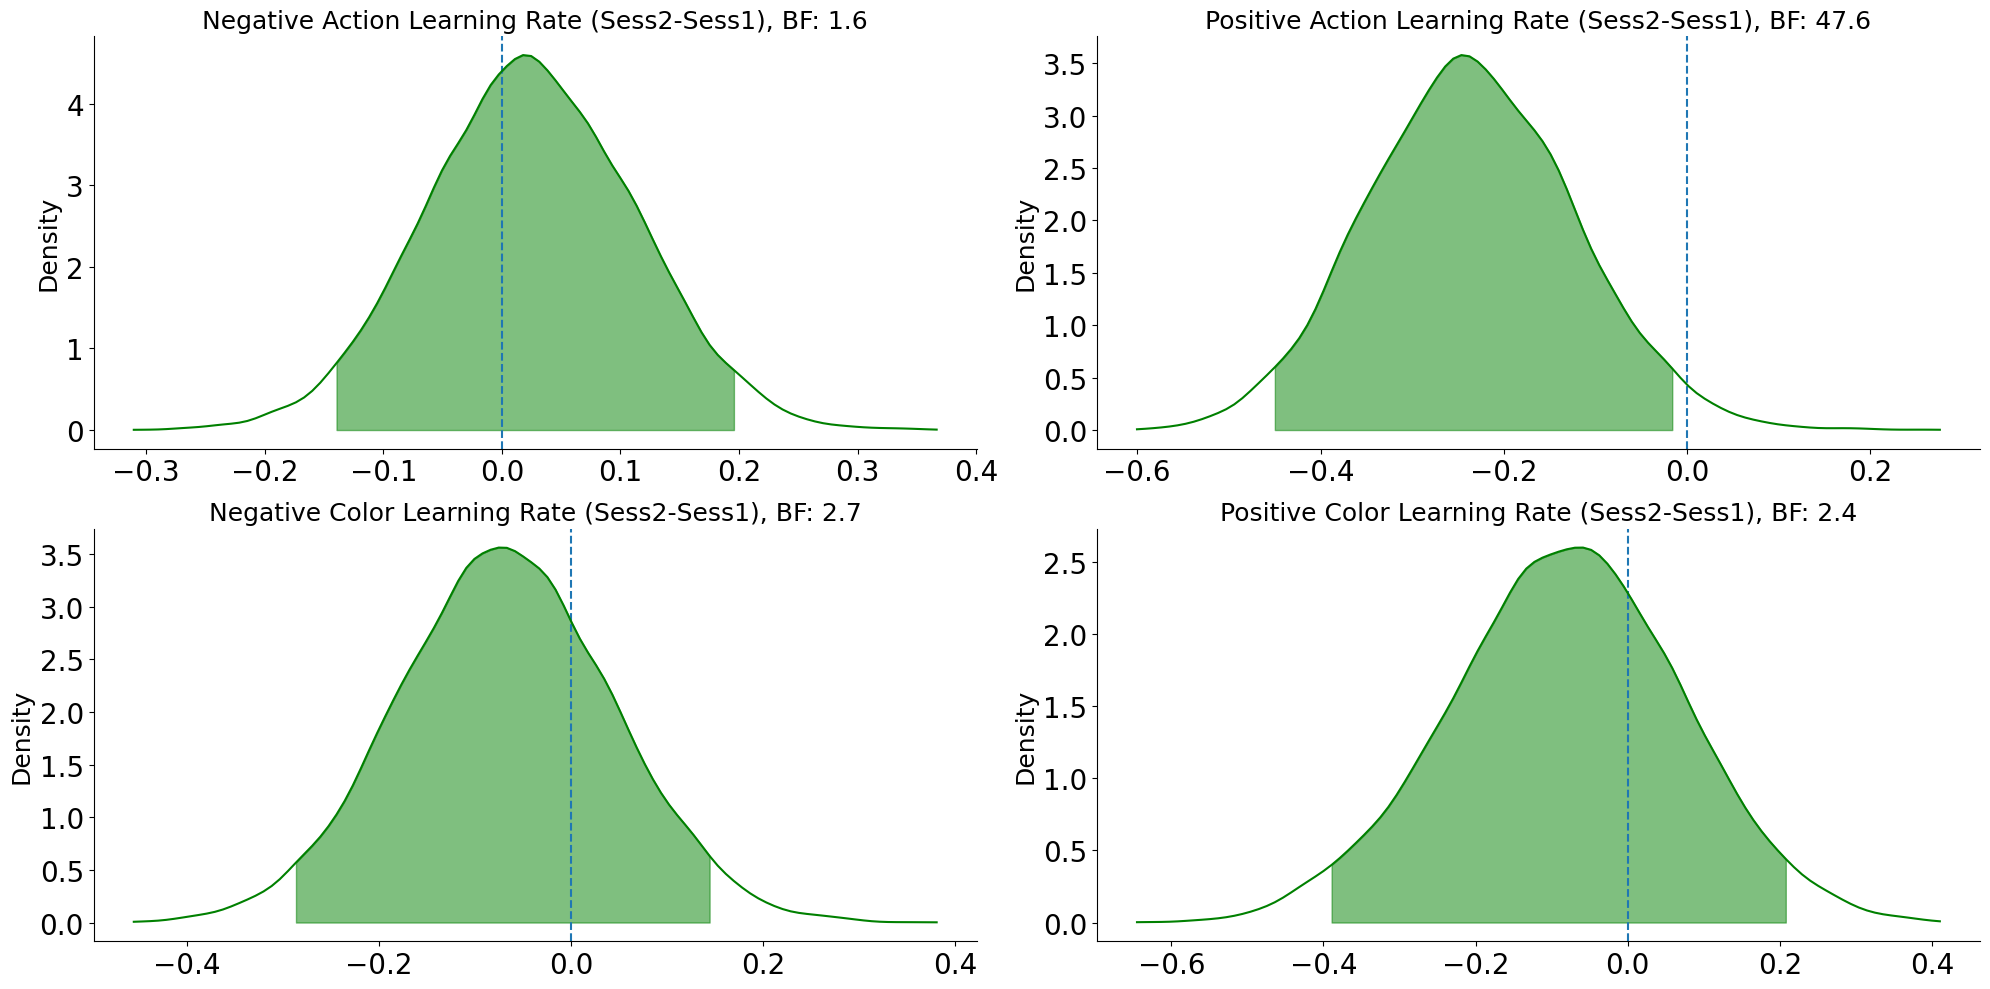

In [21]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Action Learning Rate
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=alphaAct_neg[1,0] - alphaAct_neg[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_neg[1,0] - alphaAct_neg[0,0])>0)
bf = i/(1-i)
plt.title(f'Negative Action Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Action Learning Rate
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=alphaAct_pos[1,0] - alphaAct_pos[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaAct_pos[1,0] - alphaAct_pos[0,0])>0)
bf = (1-i)/i
plt.title(f'Positive Action Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=alphaClr_neg[1,1] - alphaClr_neg[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_neg[1,1] - alphaClr_neg[0,1])>0)
bf = (1-i)/i
plt.title(f'Negative Color Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Color Learning Rate
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=alphaClr_pos[1,1] - alphaClr_pos[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((alphaClr_pos[1,1] - alphaClr_pos[0,1])>0)
bf = (1-i)/i
plt.title(f'Positive Color Learning Rate (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18)  
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)
fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ1.png', dpi=500)


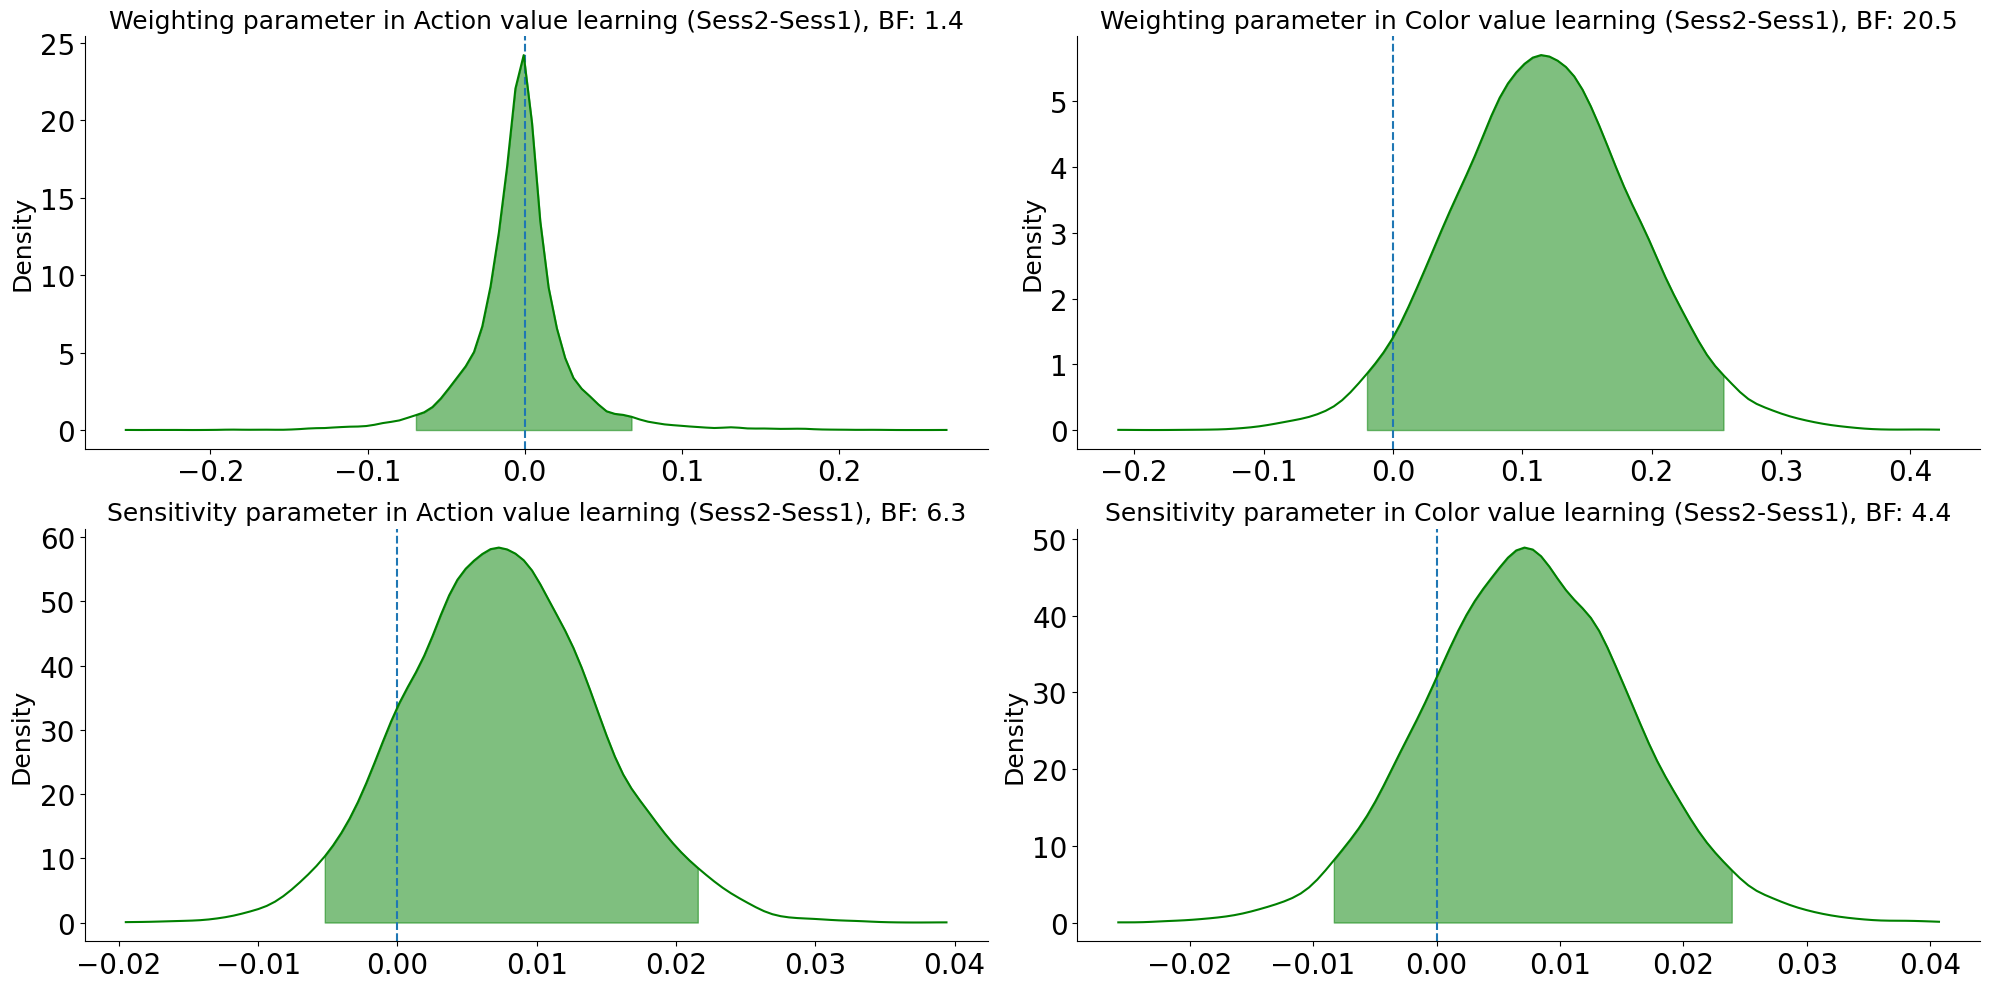

In [22]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(20, 10), tight_layout=True)
rows = 2
columns = 2

# Weightign parameter
fig.add_subplot(rows, columns, 1)
plots.plot_posterior(x=weight[1,0] - weight[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[1,0] - weight[0,0])>0)
bf = (1-i)/i
plt.title(f'Weighting parameter in Action value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 2)
plots.plot_posterior(x=weight[1,1] - weight[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((weight[1,1]- weight[0,1])>0)
bf = i/(1-i)
plt.title(f'Weighting parameter in Color value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weightign parameter
fig.add_subplot(rows, columns, 3)
plots.plot_posterior(x=beta[1,0] - beta[0,0], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[1,0] - beta[0,0])>0)
bf = i/(1-i)
plt.title(f'Sensitivity parameter in Action value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

# Weighting parameter
fig.add_subplot(rows, columns, 4)
plots.plot_posterior(x=beta[1,1] - beta[0,1], xlabel=r'$_{(A)}$', ylabel='Density', show_intervals="BCI", color='green',
                     trueValue=0)
i = np.mean((beta[1,1]- beta[0,1])>0)
bf = i/(1-i)
plt.title(f'Sensitivity parameter in Color value learning (Sess2-Sess1), BF: {round(bf,1)}', fontsize=18)
plt.ylabel('Density', fontsize=18)
plt.xlabel('', fontsize=18) 
plt.yticks(fontsize=20)
plt.xticks(fontsize=20)

fig.savefig(f'{mainScarch}/realdata/hier/{partcipant_group}/HierRL_dual_twoLR_Act_Clr_model1_differ2.png', dpi=500)
